<div style="border:solid black 2px; padding: 20px"><h1 style="color:black; margin-bottom:20px">Reviewer's comment v1</h1>
Halo Ahmad !

Perkenalkan saya disini sebagai Code Reviewers, disini dengan senang hati saya akan mereview tugas Ahmad ya.

Saya akan memberikan beberapa komen seperti dibawah ini, tolong jangan dipindah, dirubah, maupun dihapus ya.

Komen yang saya berikan akan muncul dalam warna hijau, kuning, atau pun merah seperti ini:

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

<div class="alert alert-warning">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Terdapat beberapa catatan.

</div>

<div class="alert alert-danger">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Perlu beberapa perbaikan

</div>

Dan tentu saja Ahmad dapat menjawab saya dengan menggunakan ini

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>
    
Baik kak
</div>

# A/B TESTING PROJECT



# Contents

1. Introduction

2. Unduh dan siapkan data untuk analisis

3. Analisis Data
    1. Analisis 1. Memprioritaskan Hipotesis
                1.1. Menerapkan framework ICE (Impact, Confidence, Effort) untuk memprioritaskan hipotesis
                1.2. Menerapkan framework RICE untuk memprioritaskan hipotesis
            
    2. Analisis 2. Analisis A/B Testing
                2.1. Gambaran pendapatan kumulatif berdasarkan kelompok
                2.2. Gambaran pendapatan rata-rata kumulatif berdasarkan kelompok
                2.3. Gambaran perbedaan relatif untuk pendapatan rata-rata kumulatif kelompok B yang dibandingkan 
                dengan kelompok A
                2.4. Gambaran konversi kumulatif berdasarkan kelompok
                2.5. Gambaran perbedaan relatif untuk tingkat konversi kumulatif kelompok B yang dibandingkan dengan 
                kelompok A
                2.6. Menghitung tingkat konversi setiap kelompok sebagai rasio pesanan terhadap jumlah kunjungan setiap 
                hari dan membuat grafik tingkat konversi harian dari kedua kelompok
                2.7. Membuat diagram tebar (scatter chart) untuk jumlah pesanan per pengguna
                2.8. Menghitung persentil ke-95 dan ke-99 untuk jumlah pesanan per pengguna dan menentukan titik ketika 
                suatu titik data berubah menjadi anomali
                2.9. Membuat diagram tebar (scatter chart) untuk harga pesanan
                2.10. Menghitung persentil ke-95 dan ke-99 untuk harga pesanan dan menentukan titik ketika suatu titik data berubah menjadi anomali
                2.11. Menemukan signifikansi statistik perbedaan konversi antar kelompok menggunakan data mentah
                2.12. Menemukan signifikansi statistik perbedaan pendapatan rata-rata antar kelompok menggunakan data mentah
                2.13. Menemukan signifikansi statistik perbedaan konversi antar kelompok menggunakan data yang telah 
                difilter
                2.14. Menemukan signifikansi statistik perbedaan pendapatan rata-rata antar kelompok menggunakan data 
                yang telah difilter
                2.15. Membuat keputusan berdasarkan hasil pengujian. Keputusan yang memungkinkan adalah: 
                1. Menghentikan pengujian, serta mempertimbangkan salah satu kelompok sebagai pemimpin. 
                2. Menghentikan pengujian, serta menyimpulkan bahwa tidak ada perbedaan antara kedua kelompok. 
                3. Melanjutkan pengujian.
                
4. Kesimpulan Umum

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

# 1. PENDAHULUAN

Kamu adalah seorang data analyst di sebuah toko online besar. Kamu bersama tim pemasaran telah menyusun daftar hipotesis untuk membantu meningkatkan pendapatan. 
Dalam project ini tujuannya adalah memprioritaskan hipotesis tersebut, menjalankan A/B testing, dan menganalisis hasilnya. 

# 2. MENYIAPKAN DATA-DATA UNTUK ANALISIS

In [1]:
# Memuat semua library
import pandas as pd, numpy as np
import datetime as dt
import matplotlib.pyplot as plt, seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import ttest_ind

In [2]:
#Memuat file dataset untuk analisis
df_hypotheses = pd.read_csv('/datasets/hypotheses_us.csv', sep=';')


In [3]:
#Prapemrosesan dataset pertama
df_hypotheses

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


In [4]:
df_hypotheses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [5]:
df_hypotheses.value_counts()

Hypothesis                                                                                                              Reach  Impact  Confidence  Effort
Add a customer review page. This will increase the number of orders                                                     3      2       2           3         1
Add a subscription form to all the main pages. This will help you compile a mailing list                                10     7       8           5         1
Add product recommendation blocks to the store's site. This will increase conversion and average purchase size          8      3       7           3         1
Add two new channels for attracting traffic. This will bring 30% more users                                             3      10      8           6         1
Change the background color on the main page. This will increase user engagement                                        3      1       1           1         1
Change the category structure. This will increase c

- Dataset ini terdiri dari 9 baris dan 5 kolom, berisi data tentang:

    - Hypotheses — deskripsi singkat tentang hipotesis
    - Reach — jangkauan pengguna, dalam skala satu hingga sepuluh
    - Impact — dampak terhadap pengguna, dalam skala satu hingga sepuluh
    - Confidence — keyakinan pada hipotesis, dalam skala satu sampai sepuluh
    - Effort — sumber daya yang diperlukan untuk menguji hipotesis, dalam skala satu sampai sepuluh. Semakin tinggi nilai Effort, semakin intensif sumber daya pengujiannya.

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

# 3. Analisis Data

# 1. Analisis 1. Memprioritaskan Hipotesis

File hypotheses_us.csv memuat sembilan hipotesis untuk meningkatkan pendapatan toko online dengan Reach, Impact, Confidence, dan Effort yang sudah ditentukan untuk masing-masing hipotesis.

# 1.1. Menerapkan framework ICE (Impact, Confidence, Effort) untuk memprioritaskan hipotesis

In [6]:
#Menghitung skor ICE (hasil perkalian Impact dengan Confidence dibagi dengan Effort)
df_hypotheses['ICE'] = (df_hypotheses['Impact'] * df_hypotheses['Confidence'])/ df_hypotheses['Effort']
df_hypotheses

,Hypothesis,Reach,Impact,Confidence,Effort,ICE
0,Add two new channels for attracting traffic. T...,3,10,8,6,13.333333
1,Launch your own delivery service. This will sh...,2,5,4,10,2.000000
2,Add product recommendation blocks to the store...,8,3,7,3,7.000000
3,Change the category structure. This will incre...,8,3,3,8,1.125000
4,Change the background color on the main page. ...,3,1,1,1,1.000000
5,Add a customer review page. This will increase...,3,2,2,3,1.333333
6,Show banners with current offers and sales on ...,5,3,8,3,8.000000
7,Add a subscription form to all the main pages....,10,7,8,5,11.200000
8,Launch a promotion that gives users discounts ...,1,9,9,5,16.200000


In [7]:
print(df_hypotheses[['Hypothesis','ICE']].sort_values(by='ICE', ascending=False).round(2))

                                          Hypothesis    ICE
8  Launch a promotion that gives users discounts ...  16.20
0  Add two new channels for attracting traffic. T...  13.33
7  Add a subscription form to all the main pages....  11.20
6  Show banners with current offers and sales on ...   8.00
2  Add product recommendation blocks to the store...   7.00
1  Launch your own delivery service. This will sh...   2.00
5  Add a customer review page. This will increase...   1.33
3  Change the category structure. This will incre...   1.12
4  Change the background color on the main page. ...   1.00


Dilihat dari skor ICE, hypothesis yang menjanjikan adalah hypothesis 8 dengan skor ICE 16.20

# 1.2.Menerapkan framework RICE untuk memprioritaskan hipotesis

In [8]:
df_hypotheses['RICE'] = (df_hypotheses['Reach']*df_hypotheses['Impact']*df_hypotheses['Confidence']) / df_hypotheses['Effort']
df_hypotheses

,Hypothesis,Reach,Impact,Confidence,Effort,ICE,RICE
0,Add two new channels for attracting traffic. T...,3,10,8,6,13.333333,40.0
1,Launch your own delivery service. This will sh...,2,5,4,10,2.000000,4.0
2,Add product recommendation blocks to the store...,8,3,7,3,7.000000,56.0
3,Change the category structure. This will incre...,8,3,3,8,1.125000,9.0
4,Change the background color on the main page. ...,3,1,1,1,1.000000,3.0
5,Add a customer review page. This will increase...,3,2,2,3,1.333333,4.0
6,Show banners with current offers and sales on ...,5,3,8,3,8.000000,40.0
7,Add a subscription form to all the main pages....,10,7,8,5,11.200000,112.0
8,Launch a promotion that gives users discounts ...,1,9,9,5,16.200000,16.2


In [9]:
print(df_hypotheses[['Hypothesis','RICE']].sort_values(by='RICE', ascending=False))

                                          Hypothesis   RICE
7  Add a subscription form to all the main pages....  112.0
2  Add product recommendation blocks to the store...   56.0
0  Add two new channels for attracting traffic. T...   40.0
6  Show banners with current offers and sales on ...   40.0
8  Launch a promotion that gives users discounts ...   16.2
3  Change the category structure. This will incre...    9.0
1  Launch your own delivery service. This will sh...    4.0
5  Add a customer review page. This will increase...    4.0
4  Change the background color on the main page. ...    3.0


Dilihat dari skor RICE, hypothesis yang menjanjikan adalah hypothesis 7 dengan skor RICE 112

Kesimpulan:

    - Berdasarkan skor ICE, hipotesis yang memiliki skor ICE tertinggi adalah hipotesis 8 dengan skor 16.20. 
    Hipotesis 8 memiliki nilai Impact dan Confidence yang sangat tinggi (mencapai 9) dan nilai Effort yang sedang (5), 
    namun nilai Reach (jangkauan) nya sangat kecil. 
    - Namun jika dilihat dari skor RICE, hipotesis yang menjanjikan adalah hipotesis 7 dengan skor RICE 112. 
    Hal ini dikarenakan nilai Reach (jangkauan) hipotesis 7 mencapai nilai sempurna (10). 

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

# 2. Analisis 2. Analisis A/B Testing


In [10]:
#Pada bagian dua ini kita akan menggunakan 2 dataset yakni:
orders = pd.read_csv('/datasets/orders_us.csv')
visitors = pd.read_csv('/datasets/visits_us.csv')

In [11]:
orders = orders.rename(columns={'transactionId': 'orders', 'visitorId': 'buyers'})
orders

,orders,buyers,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,100.8,B
1193,2203539145,370388673,2019-08-14,50.1,A
1194,1807773912,573423106,2019-08-14,165.3,A
1195,1947021204,1614305549,2019-08-14,5.5,A


In [12]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   orders   1197 non-null   int64  
 1   buyers   1197 non-null   int64  
 2   date     1197 non-null   object 
 3   revenue  1197 non-null   float64
 4   group    1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


Tabel orders berisi data tentang:

    - transaction_id — ID pesanan
    - visitor_id — ID pengguna yang membuat pesanan
    - date — tanggal dibuatnya pesanan
    - revenue — pendapatan dari pesanan
    - group — kelompok uji (test group) A/B tempat pengguna berada

In [13]:
visitors = visitors.rename(columns={'visits': 'visitors'})
visitors

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [14]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


tabel visits berisi data tentang:

    - date — tanggal
    - group — kelompok uji (test group) A/B
    - visitors — jumlah pengunjung pada tanggal yang ditentukan dalam kelompok uji A/B yang ditentukan

In [15]:
#Mengubah tipe data date menjadi datetime
orders['date'] = pd.to_datetime(orders['date'])

visitors['date'] = pd.to_datetime(visitors['date'])
    
print(orders.info())
print(visitors.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   orders   1197 non-null   int64         
 1   buyers   1197 non-null   int64         
 2   date     1197 non-null   datetime64[ns]
 3   revenue  1197 non-null   float64       
 4   group    1197 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 46.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB
None


<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

# 2.1. Gambaran pendapatan kumulatif berdasarkan kelompok

In [16]:
# membuat array dengan nilai kelompok tanggal berpasangan yang unik
datesGroups = orders[['date', 'group']].drop_duplicates()
datesGroups

,date,group
0,2019-08-15,B
2,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A
...,...,...
1068,2019-08-12,A
1114,2019-08-13,B
1116,2019-08-13,A
1149,2019-08-14,B


In [17]:
# mendapatkan data kumulatif harian agregat tentang pesanan
ordersAggregated = datesGroups.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg(
        {'date' : 'max', 'group': 'max', 'orders' : pd.Series.nunique, 'buyers' : pd.Series.nunique, 'revenue': 'sum'})
    , axis=1).sort_values(by=['date', 'group'])
ordersAggregated

,date,group,orders,buyers,revenue
55,2019-08-01,A,24,20,2356.8
66,2019-08-01,B,21,20,1620.0
175,2019-08-02,A,44,38,3860.3
173,2019-08-02,B,45,43,4243.8
291,2019-08-03,A,68,62,5675.5
...,...,...,...,...,...
496,2019-08-29,B,596,544,87343.0
730,2019-08-30,A,545,493,63563.5
690,2019-08-30,B,620,567,90736.3
958,2019-08-31,A,557,503,64554.9


In [18]:
# mendapatkan data kumulatif harian agregat tentang pengunjung
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg(
        {'date': 'max', 'group': 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])
visitorsAggregated

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845
...,...,...,...
496,2019-08-29,B,17708
730,2019-08-30,A,18037
690,2019-08-30,B,18198
958,2019-08-31,A,18736


In [19]:
# menggabungkan kedua tabel menjadi satu
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,2356.8,719
1,2019-08-01,B,21,20,1620.0,713
2,2019-08-02,A,44,38,3860.3,1338
3,2019-08-02,B,45,43,4243.8,1294
4,2019-08-03,A,68,62,5675.5,1845
...,...,...,...,...,...,...
57,2019-08-29,B,596,544,87343.0,17708
58,2019-08-30,A,545,493,63563.5,18037
59,2019-08-30,B,620,567,90736.3,18198
60,2019-08-31,A,557,503,64554.9,18736


<AxesSubplot:xlabel='date', ylabel='revenue'>

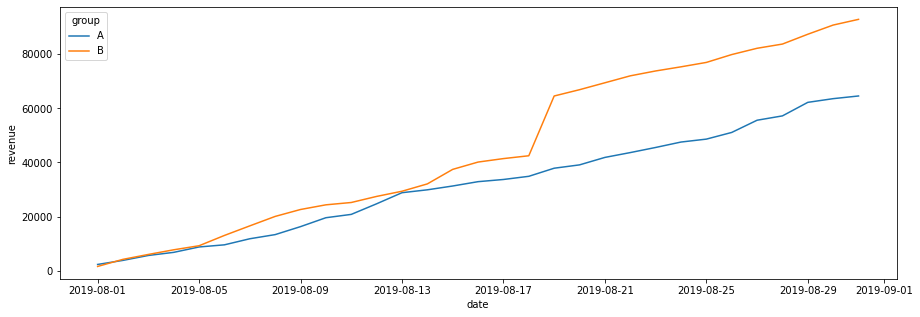

In [20]:
#Membuat diagram pendapatan kumulativ
plt.figure(figsize=(15, 5))
sns.lineplot(data=cumulativeData, x='date', y='revenue', hue='group')

Kesimpulan:

    - Berdasarkan grafik pendapatan kumulatif, di awal-awal pendapatan kumulatif group A dan group B hampir sama, 
    namun setelah tanggal 2019-08-05 pendapatan kumulatif group B terus meningkat mengalahkan group A

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

# 2.2. Gambaran pendapatan rata-rata kumulatif berdasarkan kelompok

In [21]:
#Menghitung rata-rata pendapatan kumulativ
cumulativeData['avg_rev'] = cumulativeData['revenue'] / cumulativeData['orders']
cumulativeData.head()

,date,group,orders,buyers,revenue,visitors,avg_rev
0,2019-08-01,A,24,20,2356.8,719,98.200000
1,2019-08-01,B,21,20,1620.0,713,77.142857
2,2019-08-02,A,44,38,3860.3,1338,87.734091
3,2019-08-02,B,45,43,4243.8,1294,94.306667
4,2019-08-03,A,68,62,5675.5,1845,83.463235


<AxesSubplot:xlabel='date', ylabel='avg_rev'>

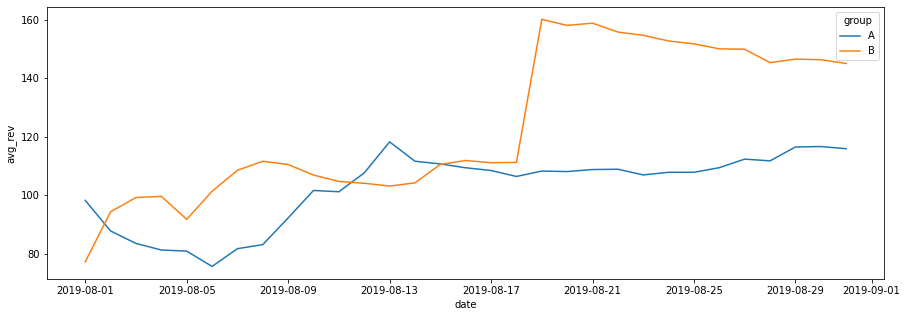

In [22]:
#Membuat diagram rata-rata pesanan kumulativ
plt.figure(figsize=(15, 5))
sns.lineplot(data=cumulativeData, x='date', y='avg_rev', hue='group')

Kesimpulan:

    - Berdasarkan grafik rata-rata pendapatan kumulatif, pendapatan group B lebih tinggi daripada group A dengan nilai rata-rata pendapatan maksimal mencapai 160 dollar.

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

# 2.3. Gambaran perbedaan relatif untuk pendapatan rata-rata kumulatif kelompok B yang dibandingkan dengan kelompok A

In [23]:
cumulativeData

,date,group,orders,buyers,revenue,visitors,avg_rev
0,2019-08-01,A,24,20,2356.8,719,98.200000
1,2019-08-01,B,21,20,1620.0,713,77.142857
2,2019-08-02,A,44,38,3860.3,1338,87.734091
3,2019-08-02,B,45,43,4243.8,1294,94.306667
4,2019-08-03,A,68,62,5675.5,1845,83.463235
...,...,...,...,...,...,...,...
57,2019-08-29,B,596,544,87343.0,17708,146.548658
58,2019-08-30,A,545,493,63563.5,18037,116.630275
59,2019-08-30,B,620,567,90736.3,18198,146.348871
60,2019-08-31,A,557,503,64554.9,18736,115.897487


In [24]:
#Mendapatkan data kumulatif untuk group A
cumulativeData_A = cumulativeData[cumulativeData['group']=='A'].reset_index(drop=True)

#Mendapatkan data kumulatif untuk group B
cumulativeData_B = cumulativeData[cumulativeData['group']=='B'].reset_index(drop=True)

mergedCumulative = cumulativeData_A.merge(cumulativeData_B,
                                 left_on='date',
                                 right_on='date',
                                 how='left',
                                 suffixes=['A', 'B'])
mergedCumulative.head()

,date,groupA,ordersA,buyersA,revenueA,visitorsA,avg_revA,groupB,ordersB,buyersB,revenueB,visitorsB,avg_revB
0,2019-08-01,A,24,20,2356.8,719,98.200000,B,21,20,1620.0,713,77.142857
1,2019-08-02,A,44,38,3860.3,1338,87.734091,B,45,43,4243.8,1294,94.306667
2,2019-08-03,A,68,62,5675.5,1845,83.463235,B,61,59,6050.6,1803,99.190164
3,2019-08-04,A,84,77,6822.1,2562,81.215476,B,78,75,7767.9,2573,99.588462
4,2019-08-05,A,109,100,8810.2,3318,80.827523,B,101,98,9262.9,3280,91.711881


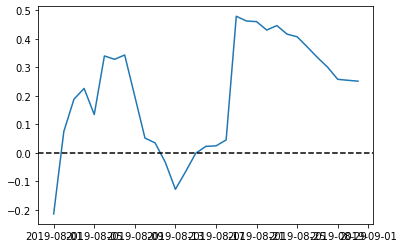

In [25]:
# membuat grafik perbedaan relatif untuk jumlah pembelian rata-rata
plt.plot(mergedCumulative['date'], (
    mergedCumulative['revenueB']/mergedCumulative['ordersB'])/(mergedCumulative['revenueA']/mergedCumulative['ordersA'])-1)

# menambahkan sumbu X
plt.axhline(y=0, color='black', linestyle='--') 

Kesimpulan:

    - Berdasarkan grafik perbedaan relatif untuk rata-rata pendapatan, dapat dilihat bahwa nilai perbedaan relatifnya lebih banyak yang positif (di atas 0), artinya rata-rata pendapatan group B lebih besar daripada group A. 

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

# 2.4. Gambaran konversi kumulatif berdasarkan kelompok

(18109.0, 18139.0, 0.0, 0.05)

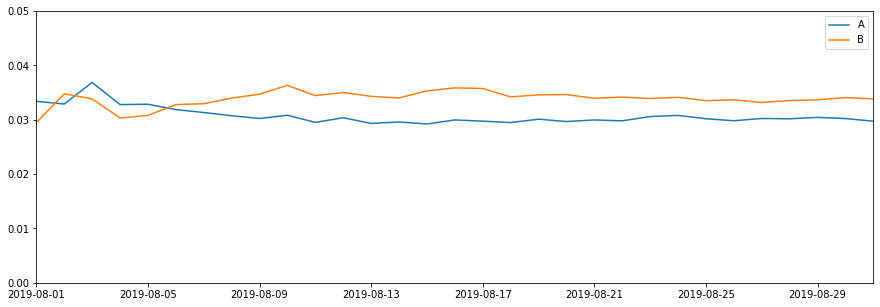

In [26]:
#Menghitung konversi kumulatif
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

#Membuat grafik 
plt.figure(figsize=(15, 5))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.axis([pd.to_datetime('2019-08-01'), pd.to_datetime('2019-08-31'), 0, 0.05])

Kesimpulan:

    - Untuk konversi kumulatif, hanya di awal-awal saja group A lebih besar. Namun setelah itu nilai konversi kumulatif
    group B selalu lebih besar.
    

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

# 2.5.Gambaran perbedaan relatif untuk tingkat konversi kumulatif kelompok B yang dibandingkan dengan kelompok A

(18109.0, 18139.0, -0.5, 0.5)

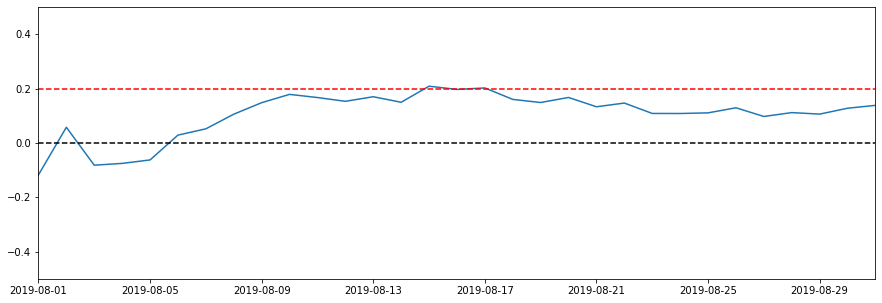

In [27]:
#Menggabungkan data cumulatif konversi A dan B
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(
    cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

#Membuat grafik
plt.figure(figsize=(15, 5))
plt.plot(
    mergedCumulativeConversions['date'], 
    mergedCumulativeConversions['conversionB']
    / mergedCumulativeConversions['conversionA']
    - 1,
)
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='red', linestyle='--')
plt.axis([pd.to_datetime('2019-08-01'), pd.to_datetime('2019-08-31'), -0.5, 0.5])

Kesimpulan:

    - Berdasarka grafik perbedaan relatif untuk tingkat konversi , di awal-awal tingkat konversi group B lebih 
    rendah daripada group A, namun setelah tanggal 2019-08-05, nilai konversi group B selalu di atas group A.

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

# 2.6. Gambaran tingkat konversi setiap kelompok sebagai rasio pesanan terhadap jumlah kunjungan setiap hari

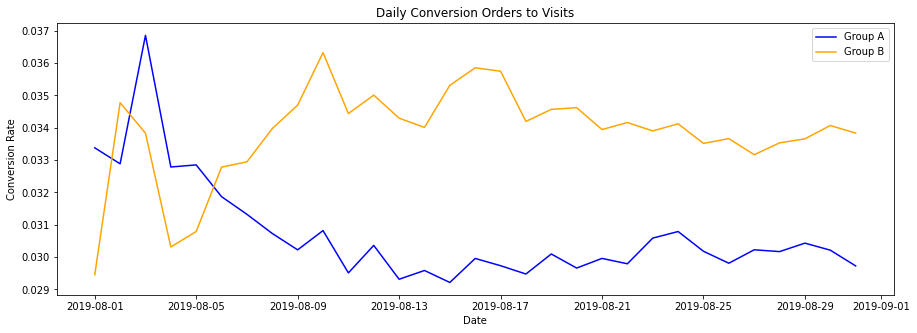

In [28]:
#Menghitung rasio konversi harian
cumulativeData['daily_conversion'] = cumulativeData['orders'] / cumulativeData['visitors']
dailyConversionA = cumulativeData[cumulativeData['group']=='A'][['date', 'daily_conversion']]
dailyConversionB = cumulativeData[cumulativeData['group']=='B'][['date', 'daily_conversion']]

#Membuat grafik tingkat konversi harian
plt.figure(figsize=(15, 5))
plt.plot(dailyConversionA['date'], dailyConversionA['daily_conversion'], label='Group A', color='blue')
plt.plot(dailyConversionB['date'], dailyConversionB['daily_conversion'], label='Group B', color='orange')
plt.title('Daily Conversion Orders to Visits')
plt.xlabel('Date')
plt.ylabel('Conversion Rate')
plt.legend()
plt.show()

Kesimpulan:

    - Berdasarkan grafik konversi harian untuk group A di awal ada nilai konversi yang sangat tinggi, namun setelah 
    itu terus menurun. Kemungkinan ini adalah nilai outlier.
    - Untuk group B di awal-awal nilai konversinya lebih kecil daripada group A, namun setelah tanggal 2019-08-05, 
    nilai konversinya selalu di atas group A.  

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

# 2.7. Diagram tebar (scatter chart) untuk jumlah pesanan per pengguna

In [29]:
orders.head()

,orders,buyers,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


          userId  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5
744   3062433592       5
55     237748145       5
917   3803269165       5
299   1230306981       5
897   3717692402       5


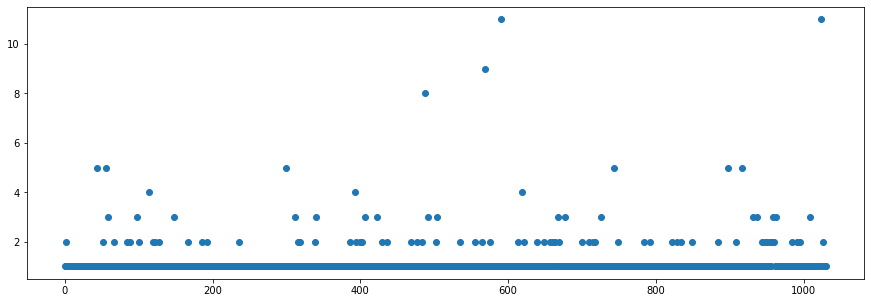

In [30]:
ordersByUsers = (
    orders.drop(['group', 'revenue', 'date'], axis=1)
    .groupby('buyers', as_index=False)
    .agg({'orders': pd.Series.nunique})
)
ordersByUsers.columns = ['userId', 'orders']

print(ordersByUsers.sort_values(by='orders', ascending=False).head(10))

# rentang angka dari 0 hingga jumlah observasi di ordersByUsers
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.figure(figsize=(15, 5))
plt.scatter(x_values, ordersByUsers['orders'])

In [31]:
print('Jumlah pesanan yang dibuat oleh pengguna kebanyakan berjumlah: {} pesanan'. format(ordersByUsers['orders'].mode()[0]))

Jumlah pesanan yang dibuat oleh pengguna kebanyakan berjumlah: 1 pesanan


Berdasarkan diagram scatter untuk jumlah pesanan per pengguna, kebanyakan jumlah pesanan yang dibuat oleh pengguna berjumlah 1 pesanan. 

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

# 2.8. Menghitung persentil ke-95 dan ke-99 untuk jumlah pesanan per pengguna dan menentukan titik ketika suatu data berubah menjadi anomali (outlier)

In [32]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([2., 4.])

In [33]:
ordersByUsers['orders'].describe()

count    1031.000000
mean        1.161009
std         0.724919
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        11.000000
Name: orders, dtype: float64

<AxesSubplot:xlabel='orders'>

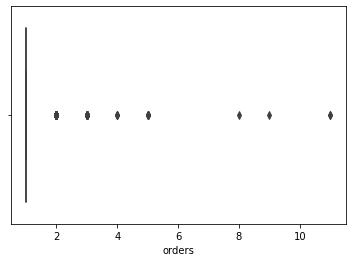

In [34]:
sns.boxplot(ordersByUsers['orders'])

Kesimpulan:

    - Hanya 5% pengguna yang membeli lebih dari 2 pesanan, dan hanya 1% pengguna yang membeli dengan jumlah diatas
    4 pesanan.

    - Jumlah pesanan di atas 2 adalah outlier

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

# 2.9. Buat diagram tebar (scatter chart) untuk pendapatan. Buat kesimpulan dan asumsinya.

In [35]:
orders.head()

,orders,buyers,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


          orders      buyers       date  revenue group
425    590470918  1920142716 2019-08-19  19920.4     B
1196  3936777065  2108080724 2019-08-15   3120.1     B
858    192721366  1316129916 2019-08-27   1450.2     A
1136   666610489  1307669133 2019-08-13   1425.8     A
744   3668308183   888512513 2019-08-27   1335.6     B
662   1811671147  4266935830 2019-08-29   1220.2     A
682   1216533772  4266935830 2019-08-29   1220.2     B
743   3603576309  4133034833 2019-08-09   1050.0     A
1103  1348774318  1164614297 2019-08-12   1025.8     A
1099   316924019   148427295 2019-08-12   1015.9     A


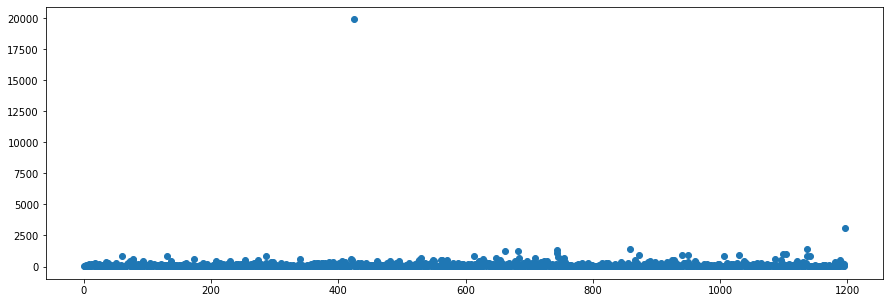

In [36]:
print(orders.sort_values(by='revenue',ascending=False).head(10))

x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(15, 5))
plt.scatter(x_values, orders['revenue'])

(0.0, 1210.0, 0.0, 1500.0)

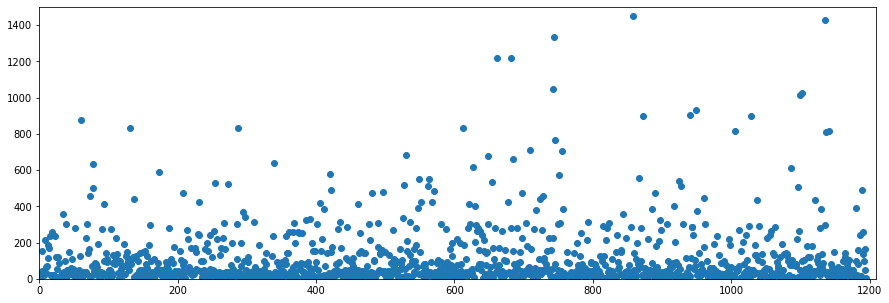

In [37]:
#Diagram scatter yang dipersempit
plt.figure(figsize=(15,5))
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.axis([0, 1210, 0,1500])

Kesimpulan:
        
        - Berdasarkan diagram scatter untuk harga pesanan (revenue), kebanyakan berada di bawah 400 dollar.

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

# 2.10. Menghitung persentil ke-95 dan ke-99 untuk pendapatan dan menentukan titik ketika suatu titik data berubah menjadi anomali (outlier)

In [38]:
np.percentile(orders['revenue'], [95, 99])

array([435.54 , 900.904])

In [39]:
orders['revenue'].describe()

count     1197.000000
mean       131.491646
std        603.004729
min          5.000000
25%         20.800000
50%         50.200000
75%        130.400000
max      19920.400000
Name: revenue, dtype: float64

Kesimpulan:

    - Hanya 5% harga pesanan di atas 435.54 dollar dan hanya 1% harga pesanan diatas 900.9 dollar

    - Harga pesanan di atas 435.54 dollar adalah outlier

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

# 2.11. Menemukan signifikansi statistik perbedaan konversi antar kelompok menggunakan data mentah

In [40]:
# Library uji statistik
import scipy.stats as stats
from scipy.stats import mannwhitneyu

In [41]:
#Kita akan menggunakan dataset orders
orders

,orders,buyers,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,100.8,B
1193,2203539145,370388673,2019-08-14,50.1,A
1194,1807773912,573423106,2019-08-14,165.3,A
1195,1947021204,1614305549,2019-08-14,5.5,A


In [42]:
#Jumlah pesanan untuk setiap user A
ordersByUsersA = orders[orders['group']=='A'].groupby('buyers', as_index=False).agg({'orders': pd.Series.nunique})
ordersByUsersA

,buyers,orders
0,8300375,1
1,11685486,1
2,54447517,1
3,66685450,1
4,78758296,1
...,...,...
498,4243832526,1
499,4256040402,7
500,4259830713,1
501,4266935830,1


In [43]:
#Jumlah pesanan untuk setiap user B
ordersByUsersB = orders[orders['group']=='B'].groupby('buyers', as_index=False).agg({'orders': pd.Series.nunique})
ordersByUsersB

,buyers,orders
0,5114589,1
1,6958315,1
2,8300375,1
3,39475350,1
4,47206413,1
...,...,...
581,4258103007,1
582,4266935830,1
583,4279090005,1
584,4281247801,1


In [44]:
#Menggabungkan semua user yang membeli dan yang tidak membeli di group A
sampleA = pd.concat(
    [ordersByUsersA['orders'], pd.Series(0, index=np.arange(
        visitors[visitors['group']=='A']['visitors'].sum() - len(ordersByUsersA['orders'])), name='orders')], axis=0)
sampleA

0        1
1        1
2        1
3        1
4        1
        ..
18228    0
18229    0
18230    0
18231    0
18232    0
Name: orders, Length: 18736, dtype: int64

In [45]:
sampleA.value_counts()

0    18233
1      473
2       17
3        7
4        3
5        2
7        1
Name: orders, dtype: int64

di group A, dari total pengunjung 18736, ada 18233 pengunjung yang tidak membeli apa-apa (ordersnya 0)

In [46]:
#Menggabungkan semua user yang membeli dan yang tidak membeli di group B
sampleB = pd.concat(
    [ordersByUsersB['orders'],pd.Series(0, index=np.arange(
        visitors[visitors['group']=='B']['visitors'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)
sampleB

0        1
1        1
2        1
3        1
4        1
        ..
18325    0
18326    0
18327    0
18328    0
18329    0
Name: orders, Length: 18916, dtype: int64

In [47]:
sampleB.value_counts()

0    18330
1      552
2       23
3        5
4        4
5        1
6        1
Name: orders, dtype: int64

di group B, dari total pengunjung 18916, ada 18330 pengunjung yang tidak membeli apa-apa (ordersnya 0)

Uji signifikansi:

    - H0 = data A dan data B secara statistik SAMA (tidak ada perbedaan yang signifikan)
    - H1 = data A dan data B secara statistik TIDAK SAMA (ada perbedaan yang signifikan)

In [48]:
alpha = 0.05
p_value = mannwhitneyu(sampleA, sampleB, nan_policy='omit').pvalue
print(f'Alpha  : {alpha}')
print(f'P-Value: {p_value}')
if p_value >= alpha:
    print('H0 Diterima: Data A dan B tidak ada perbedaan yang signifikan')
else:
    print('H0 Ditolak: Data A dan B ada perbedaan yang signifikan')
print("=======================================================")    
print("Perbedaan konversi relatif: {0:.3f}".format(sampleB.mean()/sampleA.mean()-1))

Alpha  : 0.05
P-Value: 0.016792355056752608
H0 Ditolak: Data A dan B ada perbedaan yang signifikan
Perbedaan konversi relatif: 0.138


    - Untuk data mentah, nilai p sebesar 0,0167, yang mana lebih kecil dari nilai alpha 0,05. Oleh karena itu, 
    kita tidak bisa menerima hipotesis nol karena ada perbedaan yang signifikan secara statistik dalam konversi 
    antar group. 
    - Perbedaan konversi relatif untuk group B jika dibandingkan dengan group A adalah 13,8 % dengan rata-rata 
    konversi group B lebih besar daripada group A.

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

# 2.12. Menemukan signifikansi statistik perbedaan pendapatan rata-rata antar kelompok menggunakan data mentah

In [49]:
sample_A = orders[orders['group']=='A']['revenue']
sample_A

2        10.2
7        20.1
8       215.9
10       65.7
12      115.4
        ...  
1187     15.5
1188      5.7
1193     50.1
1194    165.3
1195      5.5
Name: revenue, Length: 557, dtype: float64

In [50]:
sample_B = orders[orders['group']=='B']['revenue']
sample_B

0         30.4
1         15.2
3        155.1
4         40.5
5         35.0
         ...  
1189     490.4
1190     135.3
1191     255.7
1192     100.8
1196    3120.1
Name: revenue, Length: 640, dtype: float64

In [51]:
alpha = 0.05
p_value = mannwhitneyu(sample_A, sample_B, nan_policy='omit').pvalue
print(f'Alpha  : {alpha}')
print(f'P-Value: {p_value}')
if p_value >= alpha:
    print('H0 Diterima: Data A dan B tidak ada perbedaan yang signifikan')
else:
    print('H0 Ditolak: Data A dan B ada perbedaan yang signifikan')
print("=======================================================")    
print("Perbedaan pendapatan rata-rata: {0:.3f}".format(sample_B.mean()/sample_A.mean()-1))

Alpha  : 0.05
P-Value: 0.6915246773264736
H0 Diterima: Data A dan B tidak ada perbedaan yang signifikan
Perbedaan pendapatan rata-rata: 0.252


    - Untuk data mentah, nilai p yang kita dapatkan 0.691 lebih besar daripada nilai alpha 0.05. Ini menunjukkan 
    bahwa tidak ada perbedaan yang signifikan secara statistik dalam hal pendapatan rata-rata antar kelompok. 
    - Perbedaan pendapatan rata-rata untuk group B jika dibandingkan dengan group A adalah 25,2 % dengan rata-rata 
    pendapatan group B lebih besar daripada group A.

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

# 2.13. Menemukan signifikansi statistik perbedaan konversi antar kelompok menggunakan data yang telah difilter

In [52]:
#Memfilter data outliers
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['buyers'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['buyers'],
    ],
    axis=0,
)

usersWithExpensiveOrders = orders[orders['revenue'] > 435.4]['buyers']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0).drop_duplicates().sort_values())
len(abnormalUsers)

75

Jumlah users yang berada di luar outliers ada 75 users

In [53]:
#Membuang data outliers
sampleAFiltered = pd.concat(
    [ordersByUsersA[np.logical_not(ordersByUsersA['buyers'].isin(
        abnormalUsers))]['orders'],pd.Series(0, index=np.arange(
        visitors[visitors['group']=='A']['visitors'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)

sampleBFiltered = pd.concat(
    [ordersByUsersB[np.logical_not(ordersByUsersB['buyers'].isin(
        abnormalUsers))]['orders'],pd.Series(0, index=np.arange(
        visitors[visitors['group']=='B']['visitors'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0)

In [54]:
alpha = 0.05
p_value = mannwhitneyu(sampleAFiltered, sampleBFiltered, nan_policy='omit').pvalue
print(f'Alpha  : {alpha}')
print(f'P-Value: {p_value}')
if p_value >= alpha:
    print('H0 Diterima: Data A dan B tidak ada perbedaan yang signifikan')
else:
    print('H0 Ditolak: Data A dan B ada perbedaan yang signifikan')
print("=======================================================")    
print("Perbedaan konversi relatif: {0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

Alpha  : 0.05
P-Value: 0.01417823754717904
H0 Ditolak: Data A dan B ada perbedaan yang signifikan
Perbedaan konversi relatif: 0.171


    - Setelah membuang data outliers, nilai p berubah sedikit menjadi 0,014, yang mana tetap lebih kecil dari 
    nilai alpha 0,05. Oleh karena itu, kita tetap tidak bisa menerima hipotesis nol karena ada perbedaan yang signifikan 
    secara statistik dalam konversi antar group. 
    - Perbedaan konversi relatif untuk group B jika dibandingkan dengan group A adalah 17 % dengan rata-rata konversi 
    grop B lebih besar daripada group A.

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

# 2.14. Menemukan signifikansi statistik perbedaan pendapatan rata-rata antar kelompok menggunakan data yang telah difilter

In [55]:
sampleAFiltered2 = orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['buyers'].isin(abnormalUsers)))]['revenue']

sampleBFiltered2 = orders[np.logical_and(orders['group']=='B',np.logical_not(orders['buyers'].isin(abnormalUsers)))]['revenue']

In [56]:
alpha = 0.05
p_value = mannwhitneyu(sampleAFiltered2, sampleBFiltered2, nan_policy='omit').pvalue
print(f'Alpha  : {alpha}')
print(f'P-Value: {p_value}')
if p_value >= alpha:
    print('H0 Diterima: Data A dan B tidak ada perbedaan yang signifikan')
else:
    print('H0 Ditolak: Data A dan B ada perbedaan yang signifikan')
print("=======================================================")    
print("Perbedaan pendapatan rata-rata: {0:.3f}".format(sampleBFiltered2.mean()/sampleAFiltered2.mean()-1))

Alpha  : 0.05
P-Value: 0.7500191790687051
H0 Diterima: Data A dan B tidak ada perbedaan yang signifikan
Perbedaan pendapatan rata-rata: -0.027


    - Setelah membuang data outliers, nilai p yang kita dapatkan 0.743 lebih besar daripada nilai  alpha 0.05. Ini 
    menunjukkan bahwa tidak ada perbedaan yang signifikan secara statistik dalam hal pendapatan rata-rata antar kelompok. 
    - Perbedaan pendapatan rata-rata untuk group B jika dibandingkan dengan group A adalah 2.7 % dengan rata-rata pendapatan group B lebih kecil daripada group A setelah data outliers dibuang.
    - Jika dari segi rata-rata konversi ada perbedaan yang signifikan namun dari segi rata-rata pendapatan tidak ada 
    perbedaan yang signifikan asumsinya di salah satu group harga pembeliannnya mahal-mahal.

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

# 2.15. Membuat keputusan berdasarkan hasil pengujian. Keputusan yang memungkinkan adalah: 1. Menghentikan pengujian, serta mempertimbangkan salah satu kelompok sebagai pemimpin. 2. Menghentikan pengujian, serta menyimpulkan bahwa tidak ada perbedaan antara kedua kelompok. 3. Melanjutkan pengujian.

Keputusan berdasarkan hasil pengujian:

1. Dalam hal rata-rata konversi, baik data mentah maupun data yang telah difilter, keduanya menunjukkan ADA perbedaan yang signifikan secara statistik dengan rata-rata konversi kelompok B lebih besar daripada kelompok A.

2. Dalam hal rata-rata pendapatan, baik data mentah maupun data yang telah difilter, keduanya menunjukkan TIDAK ADA perbedaan yang signifikan secara statistik. Artinya rata-rata pendapatan kelompok B dan kelompok A hampir sama.
 
3. Grafik yang menunjukkan perbedaan konversi antar kelompok menunjukkan bahwa hasil kelompok B lebih bagus daripada kelompok A dan menunjukkan nilai yang stabil di atas kelompok A

4. Grafik yang menunjukkan perbedaan ukuran pesanan rata-rata antar kelompok menunjukkan bahwa hasil kelompok B masih naik turun, namun selalu di atas kelompok A

5. Berdasarkan fakta-fakta tersebut, bisa diambil keputusan bahwa pengujian ini berjalan dengan baik dan bisa dihentikan dengan kelompok B lebih unggul daripada kelompok A.

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>/

# 4. Kesimpulan Umum

1. Berdasarkan skor ICE, hipotesis yang memiliki skor ICE tertinggi adalah hipotesis 8 dengan skor 16.20. 
    Hipotesis 8 memiliki nilai Impact dan Confidence yang sangat tinggi (mencapai 9) dan nilai Effort yang sedang (5), 
    namun nilai Reach (jangkauan) nya sangat kecil. 
2. Namun jika dilihat dari skor RICE, hipotesis yang menjanjikan adalah hipotesis 7 dengan skor RICE 112. 
    Hal ini dikarenakan nilai Reach (jangkauan) hipotesis 7 mencapai nilai sempurna (10). 
3. Berdasarkan grafik pendapatan kumulatif, di awal-awal pendapatan kumulatif group A dan group B hampir sama, namun setelah tanggal 2019-08-05 pendapatan kumulatif group B terus meningkat mengalahkan group A
4. Berdasarkan grafik perbedaan relatif untuk rata-rata pendapatan, dapat dilihat bahwa nilai perbedaan relatifnya lebih banyak yang positif (di atas 0), artinya rata-rata pendapatan group B lebih besar daripada group A. 
5. Untuk konversi kumulatif, hanya di awal-awal saja group A lebih besar. Namun setelah itu nilai konversi kumulatif
    group B selalu lebih besar.
6. Berdasarka grafik perbedaan relatif untuk tingkat konversi , di awal-awal tingkat konversi group B lebih rendah daripada group A, namun setelah tanggal 2019-08-05, nilai konversi group B selalu di atas group A.
7. Berdasarkan grafik konversi harian untuk group A di awal ada nilai konversi yang sangat tinggi, namun setelah itu terus menurun. Kemungkinan ini adalah nilai outlier.
8. Untuk group B di awal-awal nilai konversinya lebih kecil daripada group A, namun setelah tanggal 2019-08-05, 
    nilai konversinya selalu di atas group A.  
9. Berdasarkan diagram scatter untuk jumlah pesanan per pengguna, kebanyakan jumlah pesanan yang dibuat oleh pengguna berjumlah 1 pesanan. 
10. Hanya 5% pengguna yang membeli lebih dari 2 pesanan, dan hanya 1% pengguna yang membeli dengan jumlah diatas
    4 pesanan. Jumlah pesanan di atas 2 adalah outlier
11. Berdasarkan diagram scatter untuk harga pesanan (revenue), kebanyakan berada di bawah 400 dollar.
12. Hanya 5% harga pesanan di atas 435.54 dollar dan hanya 1% harga pesanan diatas 900.9 dollar. Harga pesanan di atas 435.54 dollar adalah outlier.
13. Dalam uji signifikasi perbedaan konversi, untuk data mentah, nilai p sebesar 0,0167, yang mana lebih kecil dari nilai alpha 0,05. Oleh karena itu, kita tidak bisa menerima hipotesis nol karena ada perbedaan yang signifikan secara statistik dalam konversi antar group. Perbedaan konversi relatif untuk group B jika dibandingkan dengan group A adalah 13,8 % dengan rata-rata konversi group B lebih besar daripada group A.
14. Dalam uji signifikansi perbedaan pendapatan rata-rata, untuk data mentah, nilai p yang kita dapatkan 0.691 lebih besar daripada nilai alpha 0.05. Ini menunjukkan bahwa tidak ada perbedaan yang signifikan secara statistik dalam hal pendapatan rata-rata antar kelompok. Perbedaan pendapatan rata-rata untuk group B jika dibandingkan dengan group A adalah 25,2 % dengan rata-rata pendapatan group B lebih besar daripada group A.
15. Setelah membuang data outliers, nilai p berubah sedikit menjadi 0,014, yang mana tetap lebih kecil dari 
    nilai alpha 0,05. Oleh karena itu, kita tetap tidak bisa menerima hipotesis nol karena ada perbedaan yang signifikan secara statistik dalam konversi antar group. Perbedaan konversi relatif untuk group B jika dibandingkan dengan group A adalah 17 % dengan rata-rata konversi group B lebih besar daripada group A.
16. Setelah membuang data outliers, nilai p yang kita dapatkan 0.743 lebih besar daripada nilai  alpha 0.05. Ini menunjukkan bahwa tetap tidak ada perbedaan yang signifikan secara statistik dalam hal pendapatan rata-rata antar kelompok walaupun data outliers dibuang. Namun, perbedaan pendapatan rata-rata untuk group B jika dibandingkan dengan group A adalah 2.7 % dengan rata-rata pendapatan group B lebih kecil daripada group A setelah data outliers dibuang.
17. Jika dari segi rata-rata konversi ada perbedaan yang signifikan namun dari segi rata-rata pendapatan tidak ada perbedaan yang signifikan asumsinya di salah satu group harga pembeliannnya mahal-mahal.

18. Keputusan berdasarkan hasil pengujian:

    1. Dalam hal rata-rata konversi, baik data mentah maupun data yang telah difilter, keduanya menunjukkan ADA perbedaan yang signifikan secara statistik dengan rata-rata konversi kelompok B lebih besar daripada kelompok A.

    2. Dalam hal rata-rata pendapatan, baik data mentah maupun data yang telah difilter, keduanya menunjukkan TIDAK ADA perbedaan yang signifikan secara statistik. Artinya rata-rata pendapatan kelompok B dan kelompok A hampir sama.
 
    3. Grafik yang menunjukkan perbedaan konversi antar kelompok menunjukkan bahwa hasil kelompok B lebih bagus daripada kelompok A dan menunjukkan nilai yang stabil di atas kelompok A

    4. Grafik yang menunjukkan perbedaan ukuran pesanan rata-rata antar kelompok menunjukkan bahwa hasil kelompok B masih naik turun, namun selalu di atas kelompok A

    5. Berdasarkan fakta-fakta tersebut, bisa diambil keputusan bahwa pengujian ini berjalan dengan baik dan bisa dihentikan dengan kelompok B lebih unggul daripada kelompok A. 



<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>